## Clustering
Es una técnica de aprendizaje no supervisado que consiste en dividir un conjunto de datos en grupos, donde los elementos dentro de un mismo grupo son más similares entre sí que con los elementos de otros grupos. <br>

El clustering aglomerativo es un método de clustering que consiste en fusionar muestras hasta alcanzar el número deseado de clusters.<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

## Importar la data

In [2]:
data = pd.read_csv('data_transformada_escalada.csv',sep=',')
PCA_ds = pd.read_csv('data_PCA.csv',sep=',')

In [3]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [4]:
PCA_ds.head()

,col1,col2,col3,col4,col5,col6
0,4.986336,-0.161519,2.445158,-0.177979,1.085071,-0.429372
1,-2.874168,0.022697,-1.530797,-1.401975,1.746937,0.577904
2,2.615763,-0.731417,-0.263984,-0.040425,-0.668800,0.539707
3,-2.654568,-1.455872,-0.398069,1.295974,0.315622,0.877846
4,-0.656015,0.177868,-0.141113,1.653062,0.259336,-0.936212


## Elegir el número óptimo de clusters (Regla del codo)
Indica que la reducción de la inercia (varianza intra-cluster) ya no es significativa después de k

C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

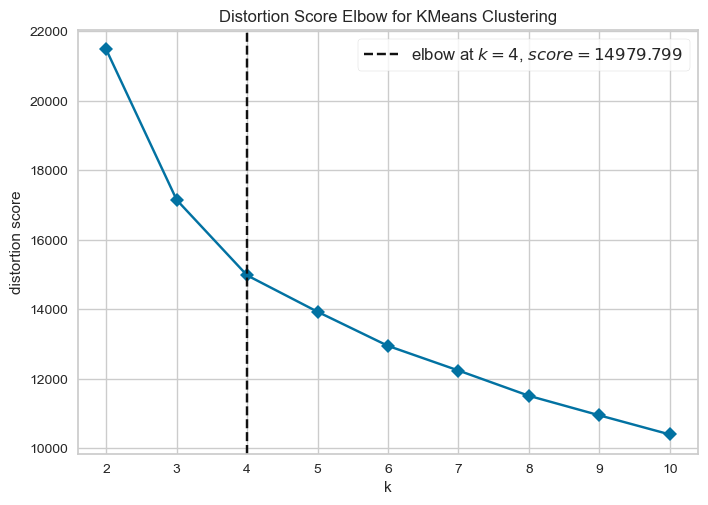

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
modelo = KMeans(n_clusters=3, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(PCA_ds)
codo.show()

### Silhouette score
Mide qué tan bien se agrupan los puntos dentro de un cluster y qué tan separados están de otros clusters.

Sugiere que los datos están mejor separados en k grupos bien definidos, pero si los clusters son muy compactos, podría subestimar k



In [6]:
silhouette_scores = []
K_range = range(2, 11)  

for k in K_range:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = modelo.fit_predict(PCA_ds)
    silhouette_scores.append(silhouette_score(PCA_ds, clusters))

best_k = K_range[np.argmax(silhouette_scores)]
print(f"Mejor k según Silhouette Score: {best_k}")

C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Mejor k según Silhouette Score: 2


### Davies-Bouldin Index (DBI)
Mide la compactación y separación de los clusters.

Valores bajos → Mejores clusters.
Valores altos → Peor clustering.

In [7]:
db_k2 = davies_bouldin_score(PCA_ds, KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(PCA_ds))
db_k4 = davies_bouldin_score(PCA_ds, KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(PCA_ds))

print(f"DBI para k=2: {db_k2}, DBI para k=4: {db_k4}")

C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


DBI para k=2: 1.1665051517167626, DBI para k=4: 1.4468757588137842


## Entrenar modelo de partición equivalente

In [8]:
modelo = KMeans(n_clusters=2, random_state=42, n_init=10)
modelo.fit(PCA_ds)

C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=42)

In [9]:
PCA_ds['Cluster'] = modelo.labels_
data['Cluster'] = modelo.labels_

## Visualización

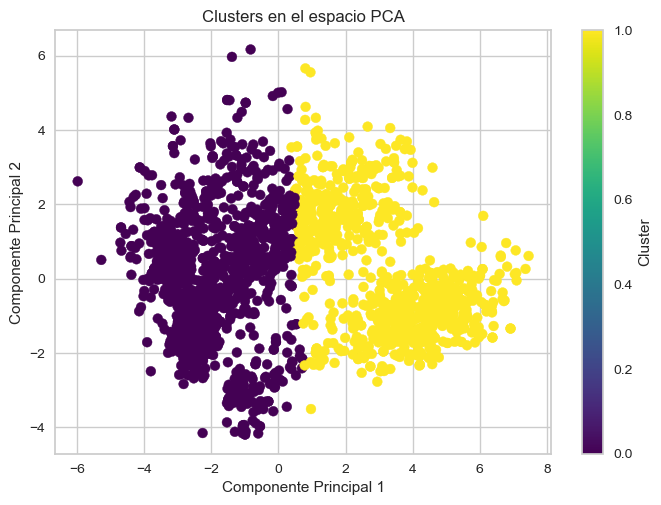

In [10]:
x = PCA_ds.iloc[:, 0] 
y = PCA_ds.iloc[:, 1]  

plt.scatter(x, y, c=modelo.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

## Visualizar 3 componentes principales

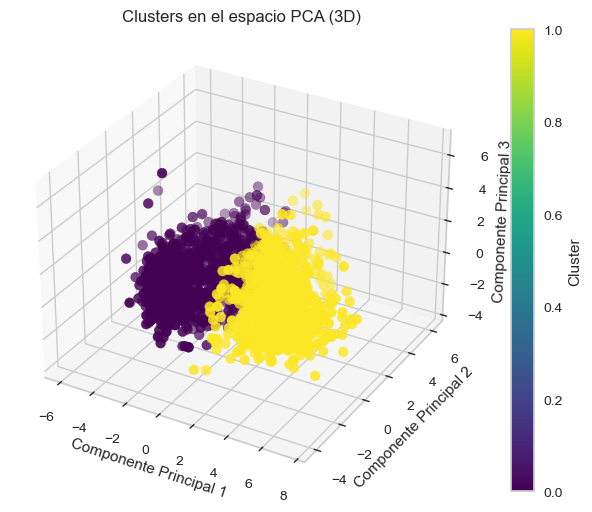

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_ds.iloc[:, 0]  
y = PCA_ds.iloc[:, 1]  
z = PCA_ds.iloc[:, 2]  

scatter = ax.scatter(x, y, z, c=modelo.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

## Evaluar la calidad
### Coeficiente de silhouette
Mide qué tan bien están separados los clusters entre sí y qué tan similares son los puntos dentro de cada cluster. Un valor cercano a 1 indica buenos clusters, mientras que valores cercanos a 0 indican clusters superpuestos.

In [14]:
score = silhouette_score(PCA_ds, modelo.labels_)
print(f"Coeficiente de silhouette={score}")

Coeficiente de silhouette=0.36100474573054603


### Davies-Bouldin Index 
Mide la compactación y separación de los clusters.

- Valores bajos → Mejores clusters.
- Valores altos → Peor clustering.

In [15]:
dbi_kmeans = davies_bouldin_score(PCA_ds, modelo.labels_)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")

Davies-Bouldin Index - KMeans: 1.1456311238697792


## Estadística descriptiva para cada cluster

In [16]:
cluster_stats = data.groupby('Cluster').describe()
display(cluster_stats)

Education                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          1363.0  0.054575  1.028644 -0.893586 -0.893586  0.571657  0.571657   
1           849.0 -0.087616  0.946866 -0.893586 -0.893586 -0.893586  0.571657   

                 Income            ... Family_Size           Is_Parent  \
            max   count      mean  ...         75%       max     count   
Cluster                            ...                                   
0        2.0369  1363.0 -0.579205  ...     0.44907  2.656499    1363.0   
1        2.0369   849.0  0.929866  ...     0.44907  1.552784     849.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Cluster                                                                        
0        0.429448  0.639112 -1.581139  0.632456  0.632456  0.632456  0.632456  
1       -0.689444  1.086334 -1.581139 -1.581139 -1.581139  0.632456  0.632456  

[2 rows x 184 columns]

## Visualizar diferencias entre clusters

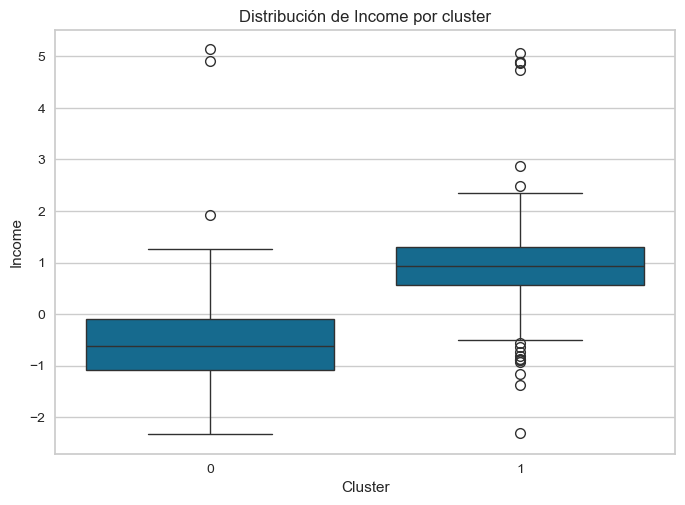

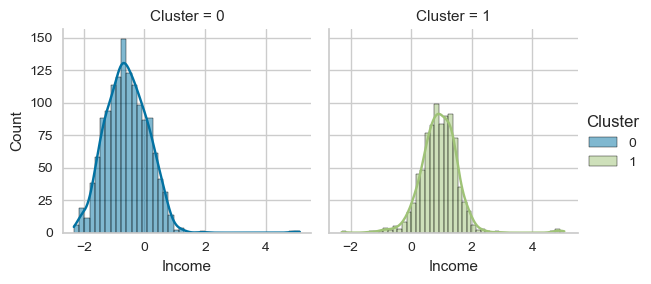

In [17]:
sns.boxplot(x='Cluster', y='Income', data=data)
plt.title('Distribución de Income por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "Income", kde=True).add_legend()
plt.show()

## Distribución de los Datos
Observar la posición de la mediana dentro de la caja:
- Si la mediana está en el centro de la caja, los datos son aproximadamente simétricos .
- Si la mediana está más cerca de Q1, los datos están sesgados hacia la derecha (asimetría positiva ).
- Si la mediana está más cerca de Q3, los datos están sesgados hacia la izquierda (asimetría negativa ).
## Dispersión de los Datos
La altura de la caja indica la dispersión de los datos centrales (50% de los datos):
- Una caja alta sugiere mayor variabilidad.
- Una caja baja sugiere menor variabilidad.
## Rango de los Datos
Los bigotes muestran el rango de los datos excluyendo los outliers:
- Bigotes largos indican que los datos están más dispersos.
- Bigotes cortos indican que los datos están más concentrados.
## Valores Atípicos
Los puntos fuera de los bigotes son valores atípicos. Estos pueden ser:
- Errores de medición que deben corregirse.
- Comportamientos inusuales que merecen análisis adicional.